Demo notebook where we will run our algorithm against test samples.

In [6]:
import sys

sys.path.append("../src")

In [7]:
from draw.graph import draw_interaction_graph
from rdkit import Chem

from draw.features import draw_docking, draw_feature_list
from graph.interaction_graph import (
    InteractionNode,
    build_binding_interaction_graph,
    build_distance_matrix,
)
from mol_processing.features import name_features_by_count
from mol_processing.mol import get_features

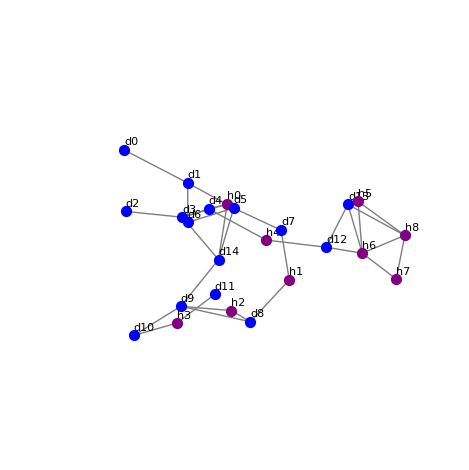

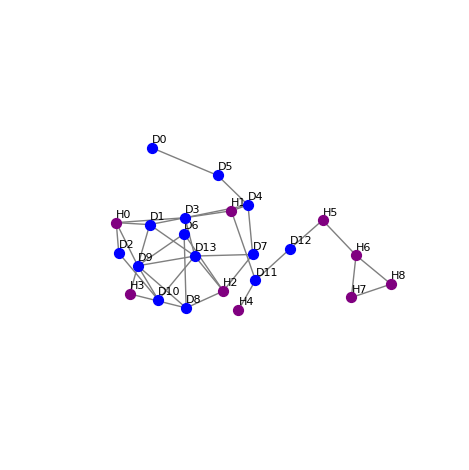

In [16]:
mol = Chem.MolFromPDBFile("../data/receptors/1AO2.pdb", sanitize=True, removeHs=False)
R_features = get_features(mol, "receptor")[::2]
L_features = get_features(mol, "ligand")[1::2]

name_features_by_count(R_features, is_ligand=False)
name_features_by_count(L_features, is_ligand=True)

R_distance_matrix = build_distance_matrix(R_features)
L_distance_matrix = build_distance_matrix(L_features)

draw_feature_list(R_features, R_distance_matrix)
draw_feature_list(L_features, L_distance_matrix)

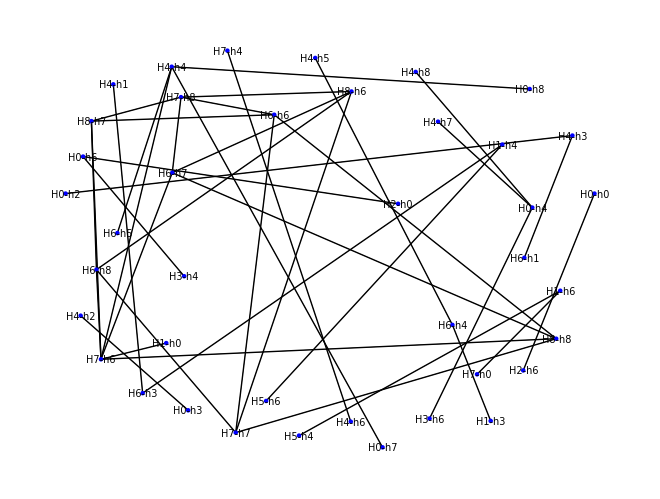

In [9]:
interaction_graph = build_binding_interaction_graph(L_distance_matrix, R_distance_matrix)
draw_interaction_graph(interaction_graph)

In [10]:
# MAPPING TO UDG

In [11]:
# UDG TO MIS

In [12]:
from solver.classical import find_max_clique

max_clique = find_max_clique
print(max_clique)

<function find_max_clique at 0x146b96de0>


In [13]:
# QUANTUM SOLVER

In [14]:
# RESULT TO DOCKING POSES LIST

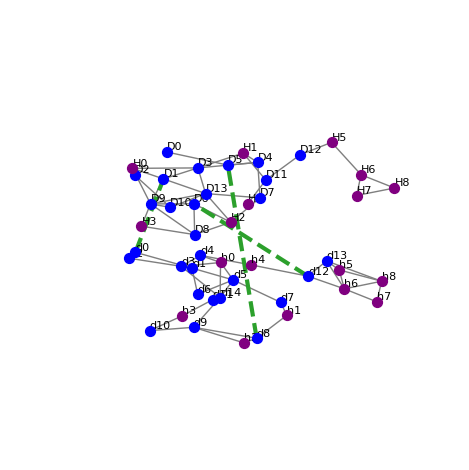

In [15]:
docking = [
    InteractionNode(R_feature=R_features[0], L_feature=L_features[1], weight=10),
    InteractionNode(R_feature=R_features[8], L_feature=L_features[5], weight=10),
    InteractionNode(R_feature=R_features[12], L_feature=L_features[6], weight=10),
]

draw_docking(
    L_features,
    L_distance_matrix,
    R_features,
    R_distance_matrix,
    interacting_nodes=docking,
)